In [ ]:
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

from imblearn.over_sampling import SMOTE

In [ ]:
df=pd.read_csv("/content/clinical data.csv")
df

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
df.isnull().sum()

index                      0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

In [ ]:
del df["index"]

In [ ]:
df["Heart Disease"].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [ ]:
df["Heart Disease"]=df["Heart Disease"].map({"Absence":0,"Presence":1})
df['Heart Disease']=df['Heart Disease'].astype(float)

In [ ]:
abs(df.corr()['Heart Disease']).sort_values(ascending=False)

Heart Disease              1.000000
Thallium                   0.525020
Number of vessels fluro    0.455336
Exercise angina            0.419303
Max HR                     0.418514
ST depression              0.417967
Chest pain type            0.417436
Slope of ST                0.337616
Sex                        0.297721
Age                        0.212322
EKG results                0.182091
BP                         0.155383
Cholesterol                0.118021
FBS over 120               0.016319
Name: Heart Disease, dtype: float64

In [ ]:
x,y=df.drop(["Heart Disease","FBS over 120","EKG results","BP","Cholesterol"],axis=1),df[["Heart Disease"]]
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)
x_sm=scaler.fit_transform(x_sm)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.20,random_state=42)

In [ ]:
x.shape

(270, 9)

In [ ]:
model=Sequential()
model.add(Dense(12,activation="relu"))
model.add(Dense(24,activation="relu"))
model.add(Dense(48,activation="relu"))
model.add(Dense(24,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics="accuracy")

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=10,epochs=50,verbose=1)
model.summary()

Epoch 1/50
24/24 [==============================] - 1s 10ms/step - loss: 0.6813 - accuracy: 0.6042 - val_loss: 0.6688 - val_accuracy: 0.7167
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6529 - accuracy: 0.7167 - val_loss: 0.6362 - val_accuracy: 0.8000
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6141 - accuracy: 0.7375 - val_loss: 0.5860 - val_accuracy: 0.7833
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5595 - accuracy: 0.7750 - val_loss: 0.5181 - val_accuracy: 0.8000
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5207 - accuracy: 0.7750 - val_loss: 0.4454 - val_accuracy: 0.8000
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.4865 - accuracy: 0.7708 - val_loss: 0.4216 - val_accuracy: 0.8167
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.4754 - accuracy: 0.7792 - val_loss: 0.4145 - val_accuracy: 0.8000
Epoch 8/50
24/24 [=

In [ ]:
scores=model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.3247 - accuracy: 0.8833


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


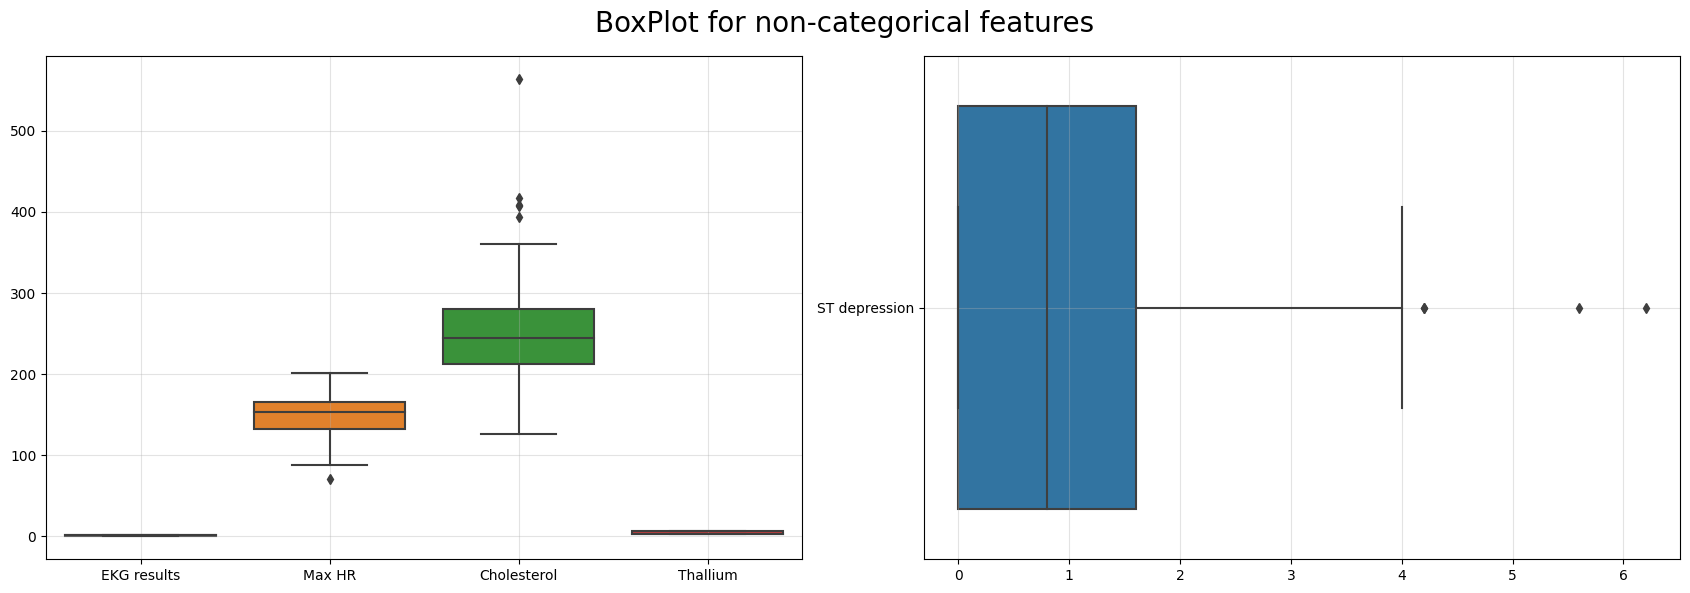

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize =[17,6], sharey=False)

plt.suptitle("BoxPlot for non-categorical features", fontsize=20)

ax1 = sns.boxplot(data=df[["EKG results","Max HR","Cholesterol","Thallium"]], ax=ax1)
ax1.grid(alpha=0.35)

ax2 = sns.boxplot(data=df[["ST depression"]], orient="h",ax=ax2)
ax2.grid(alpha=0.35)

plt.tight_layout()
plt.show()

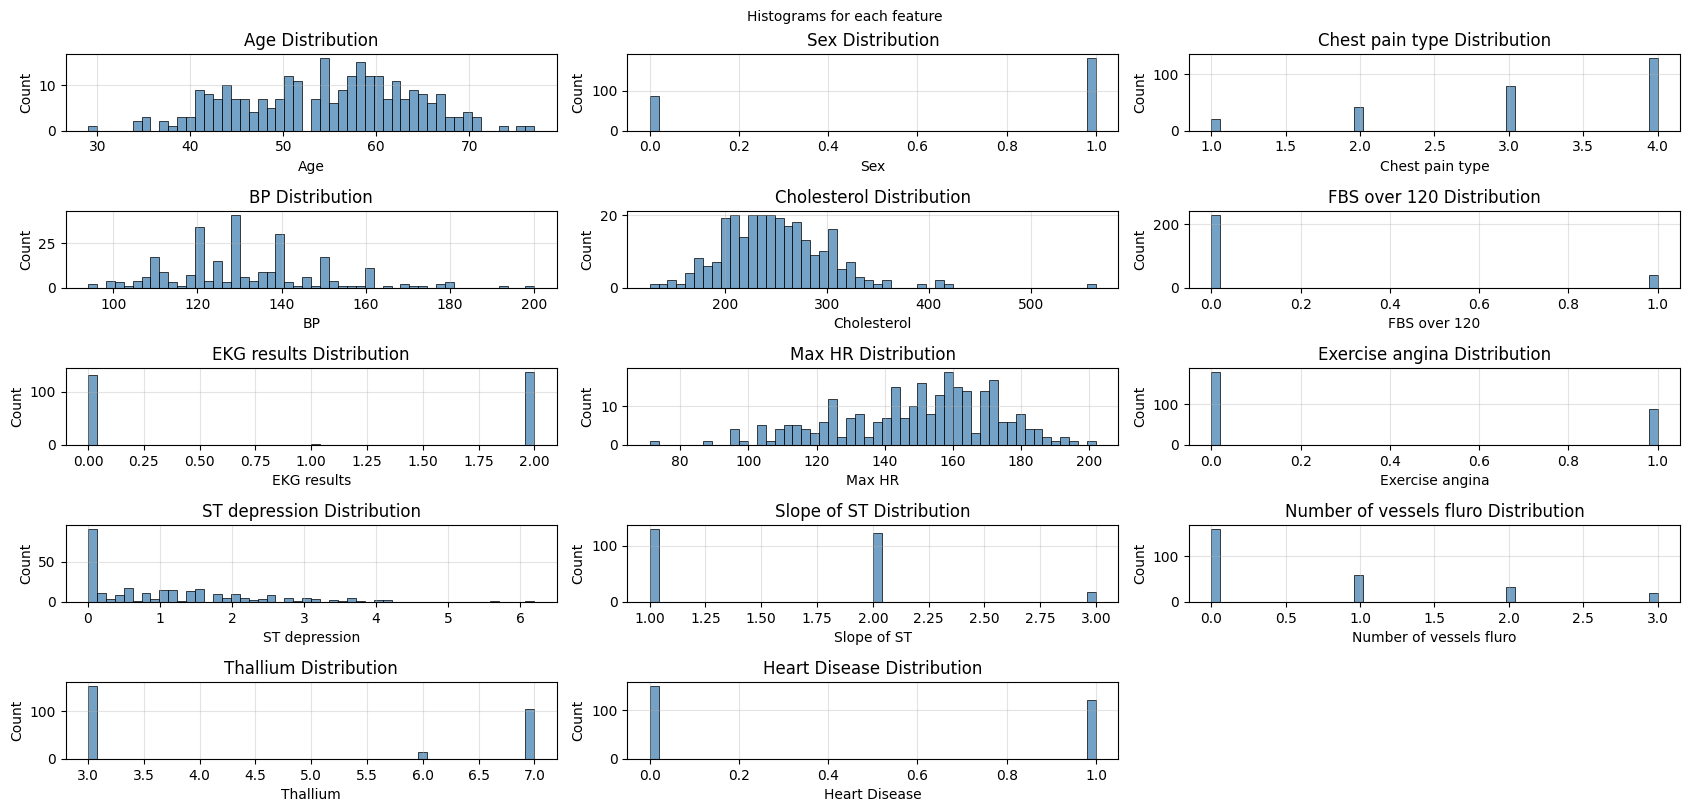

In [ ]:
# Create a new dataframe with all the features except the target feature
data = df.loc[:, ~df.columns.isin(["Heart_Disease"])]

# Find the number of variables in the dataframe
num_vars =  len(data.columns)

# Calculate the number of rows and columns needed for the grid of subplots
num_rows = (num_vars // 2) + (num_vars % 2)
num_cols = 3

# Grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(17, 11))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

# Loop through each variable and plot a histogram for each one
for i, col in enumerate(data.columns):
    sns.histplot(data[col], bins=50, ax=axes[i], color="steelblue")
    axes[i].set_title(f"{col} Distribution")
    axes[i].grid(alpha=0.35)

# Remove any extra subplots from the grid
for j in range(num_vars, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.suptitle("Histograms for each feature", fontsize=10)
plt.tight_layout()
plt.show()

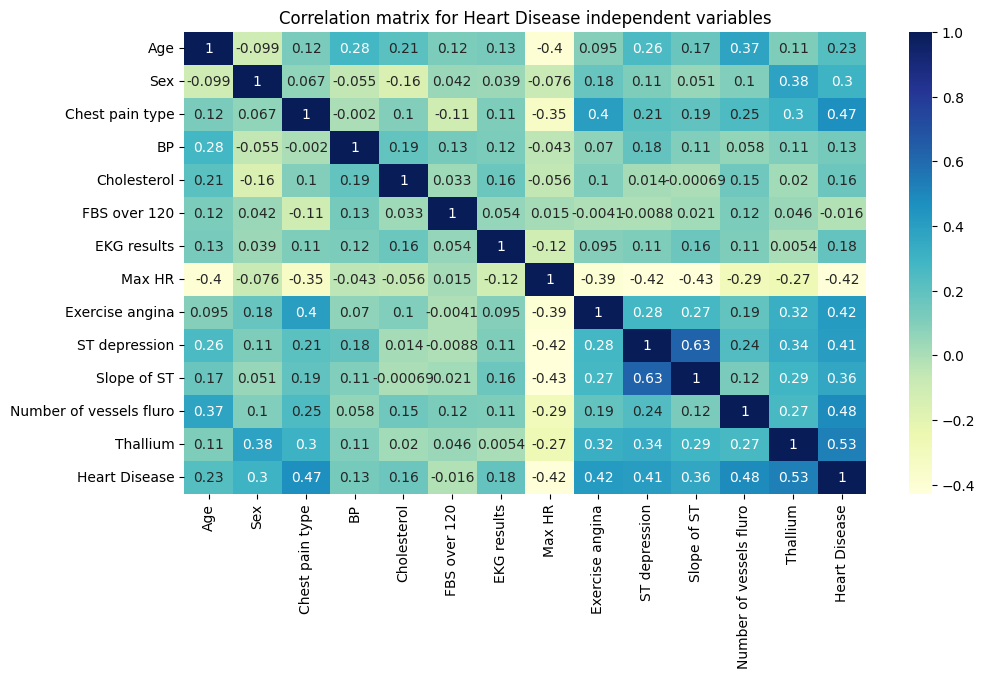

In [ ]:
# Calculating the correlation matrix using the Spearman method
corr_matrix = df.corr(method="spearman")

# Plotting a heatmap with the results of the correlation matrix
plt.figure(figsize=[11,6])
sns.heatmap(data=corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation matrix for Heart Disease independent variables", fontsize=12)
plt.show()

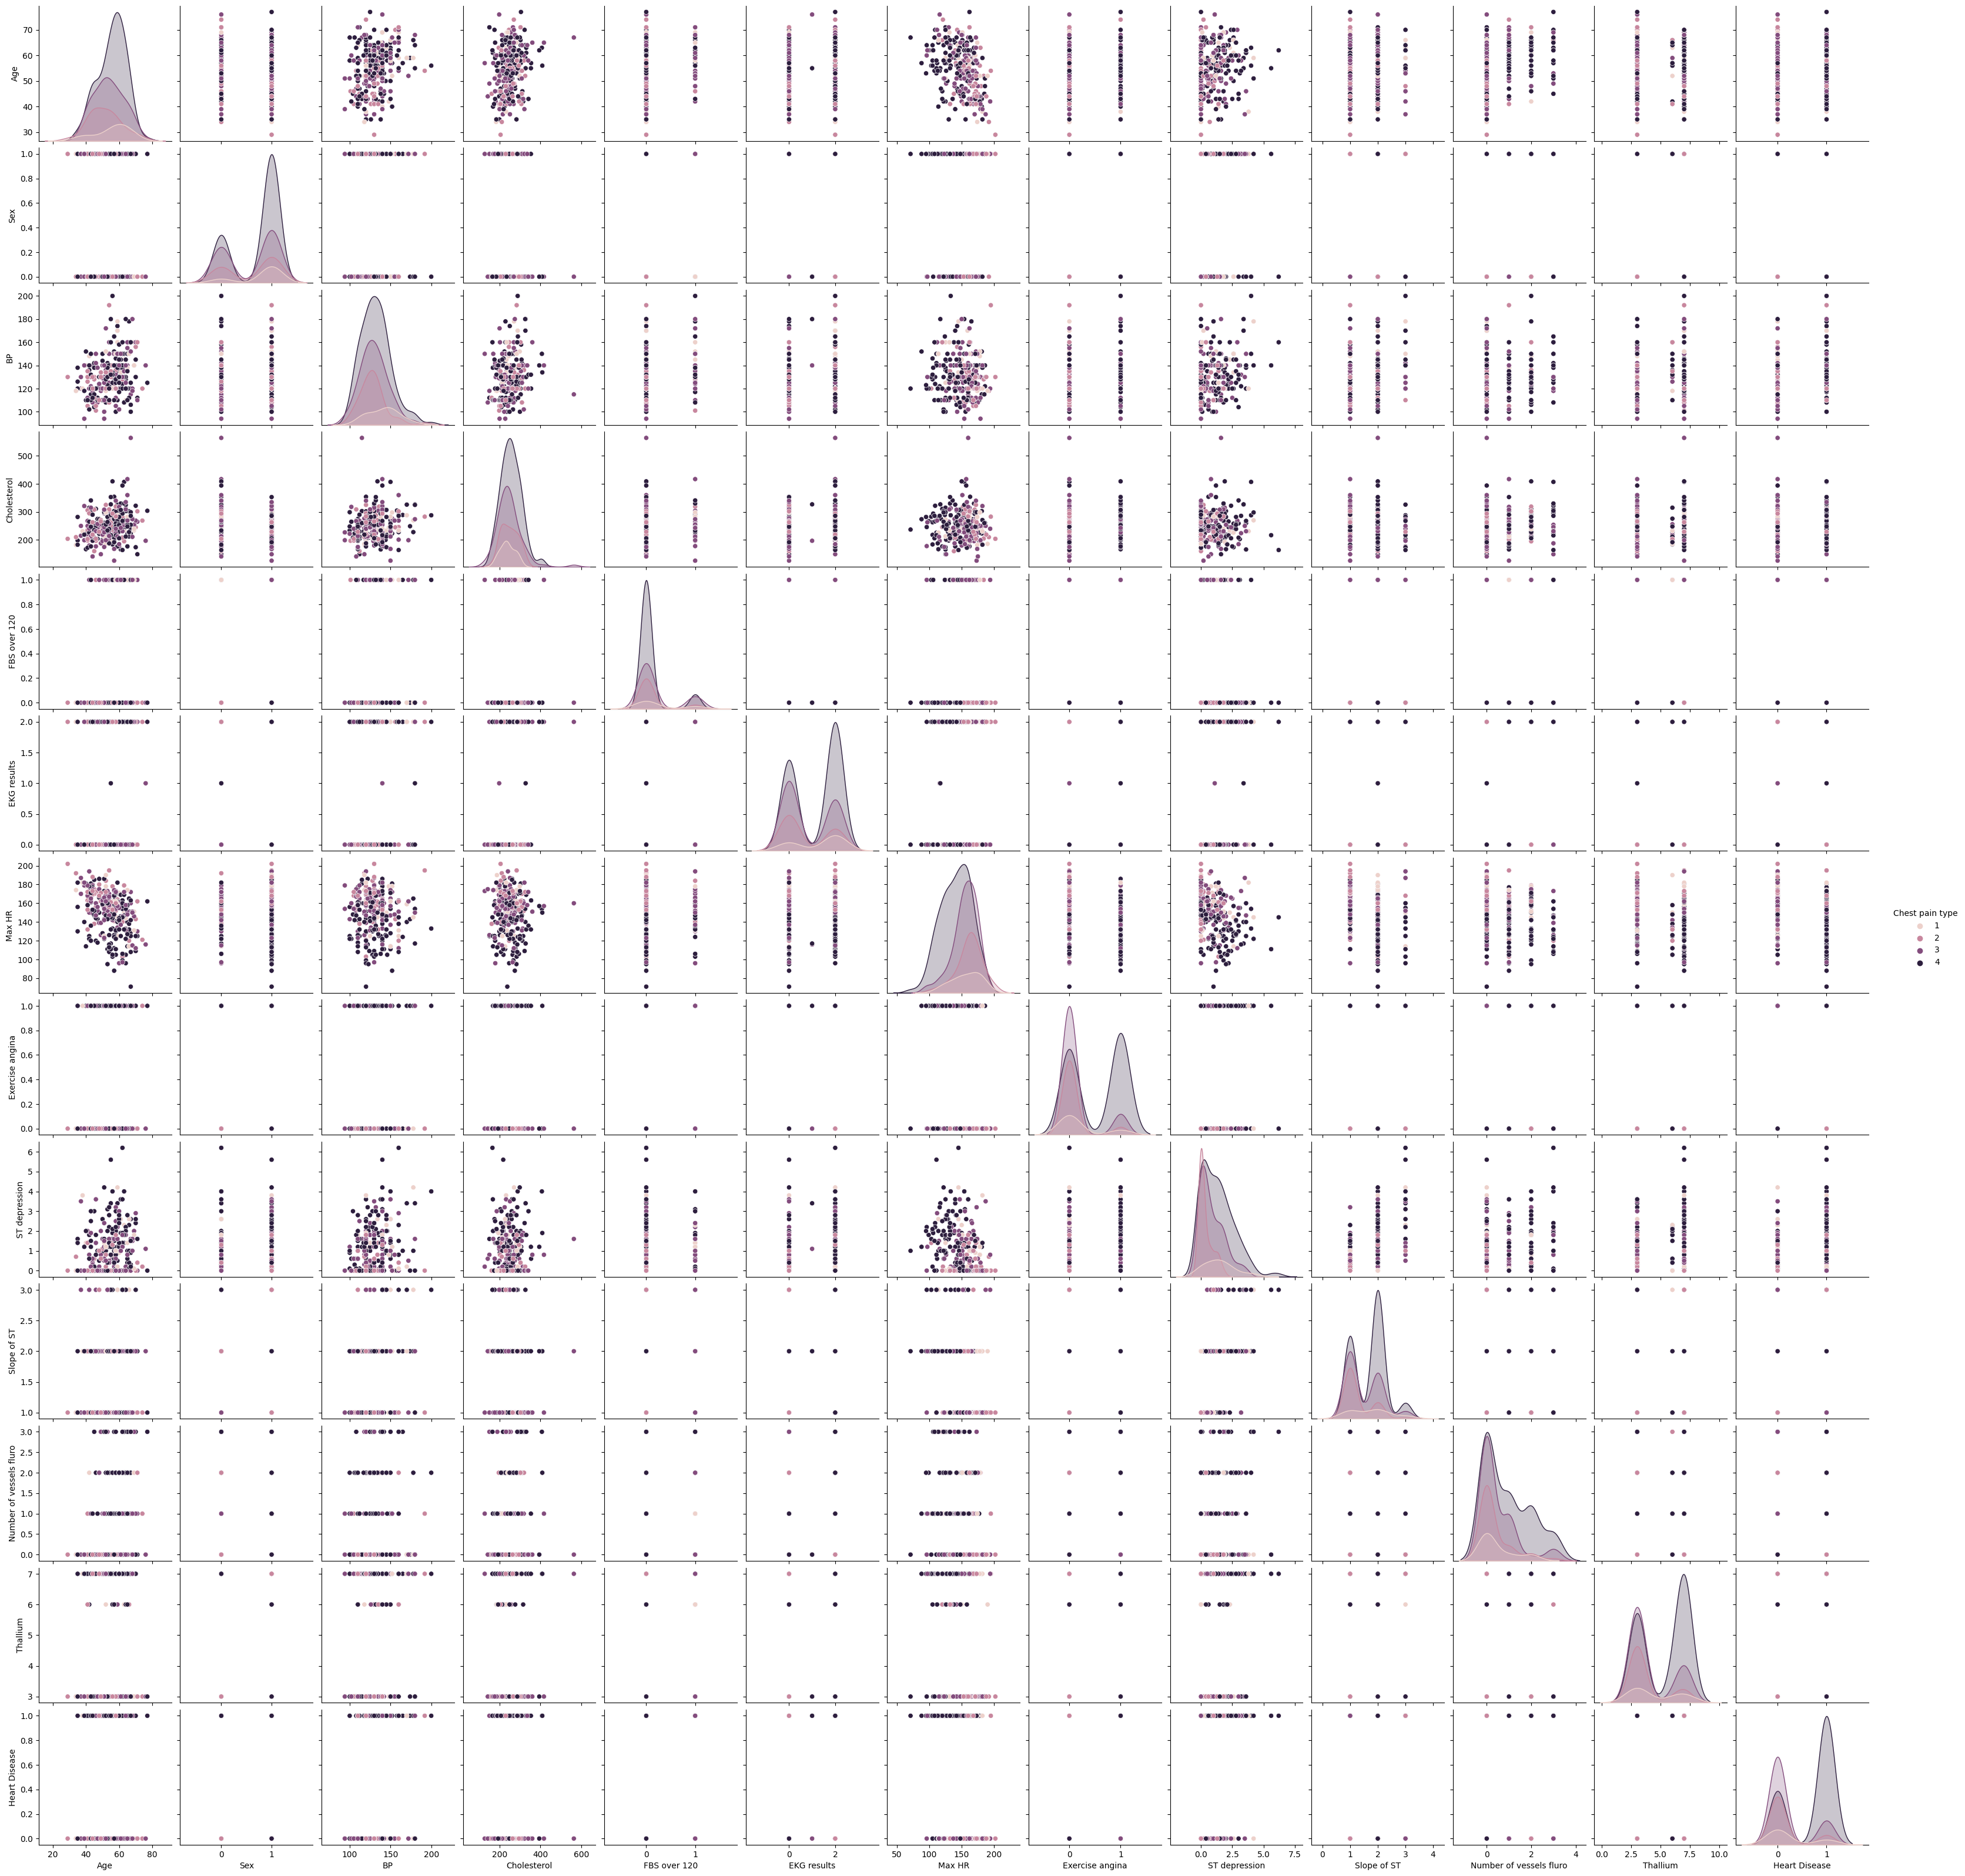

In [ ]:
sns.pairplot(data=df, hue="Chest pain type")

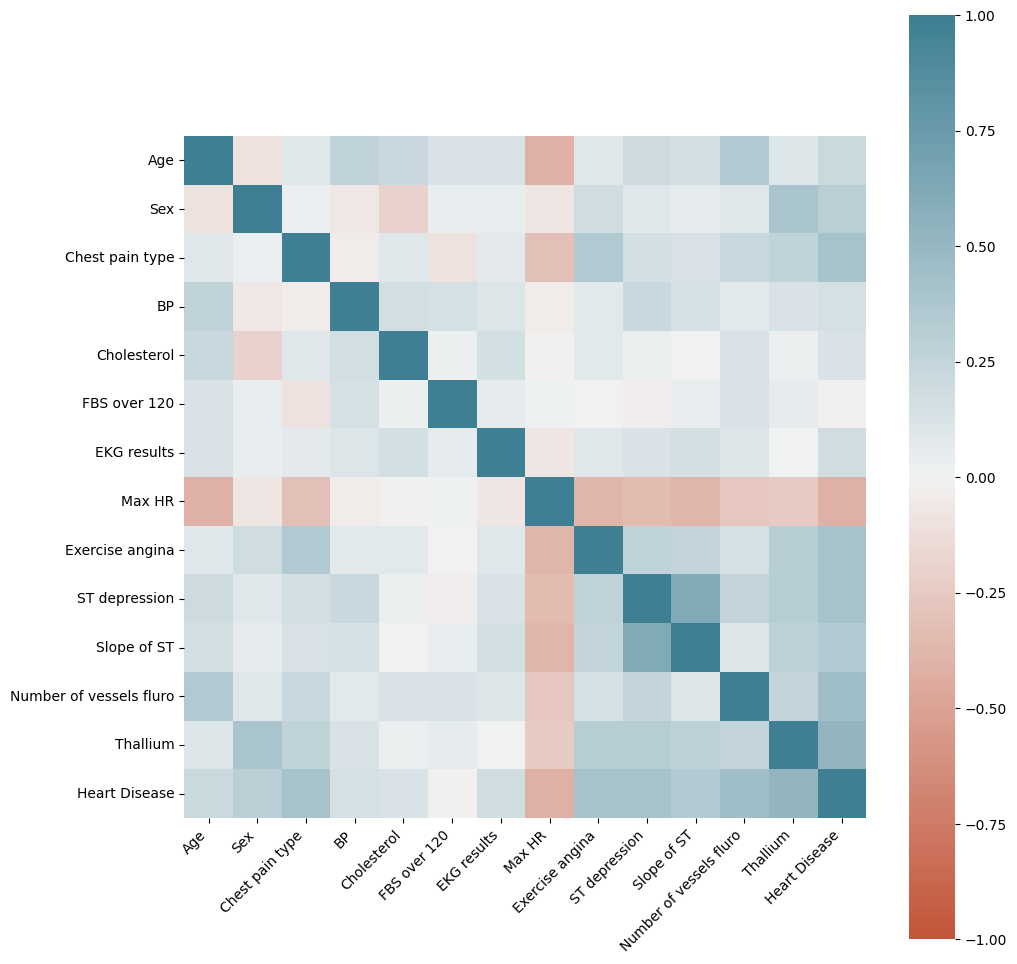

In [ ]:
corr = df.corr()

plt.figure(figsize=(11,12))
ax = sns.heatmap(corr,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')

plt.show()